In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [4]:
# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
     

# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Convert 'TotalCharges' to numeric, handling missing values by coercion to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# Drop rows where 'TotalCharges' is NaN
df.dropna(subset=['TotalCharges'], inplace=True)

In [7]:
# Check for remaining missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


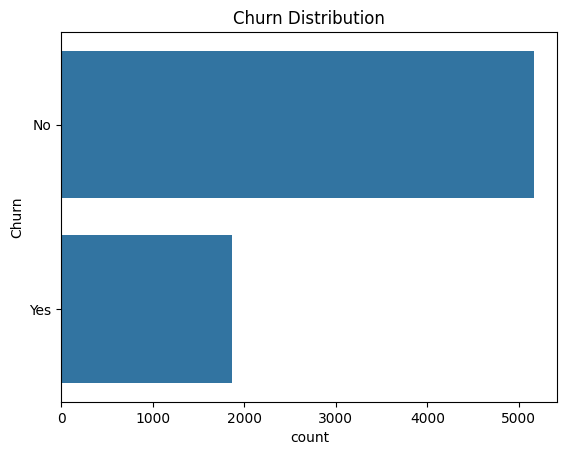

In [8]:
# Visualize churn distribution
sns.countplot(df['Churn'])
plt.title('Churn Distribution')
plt.show()

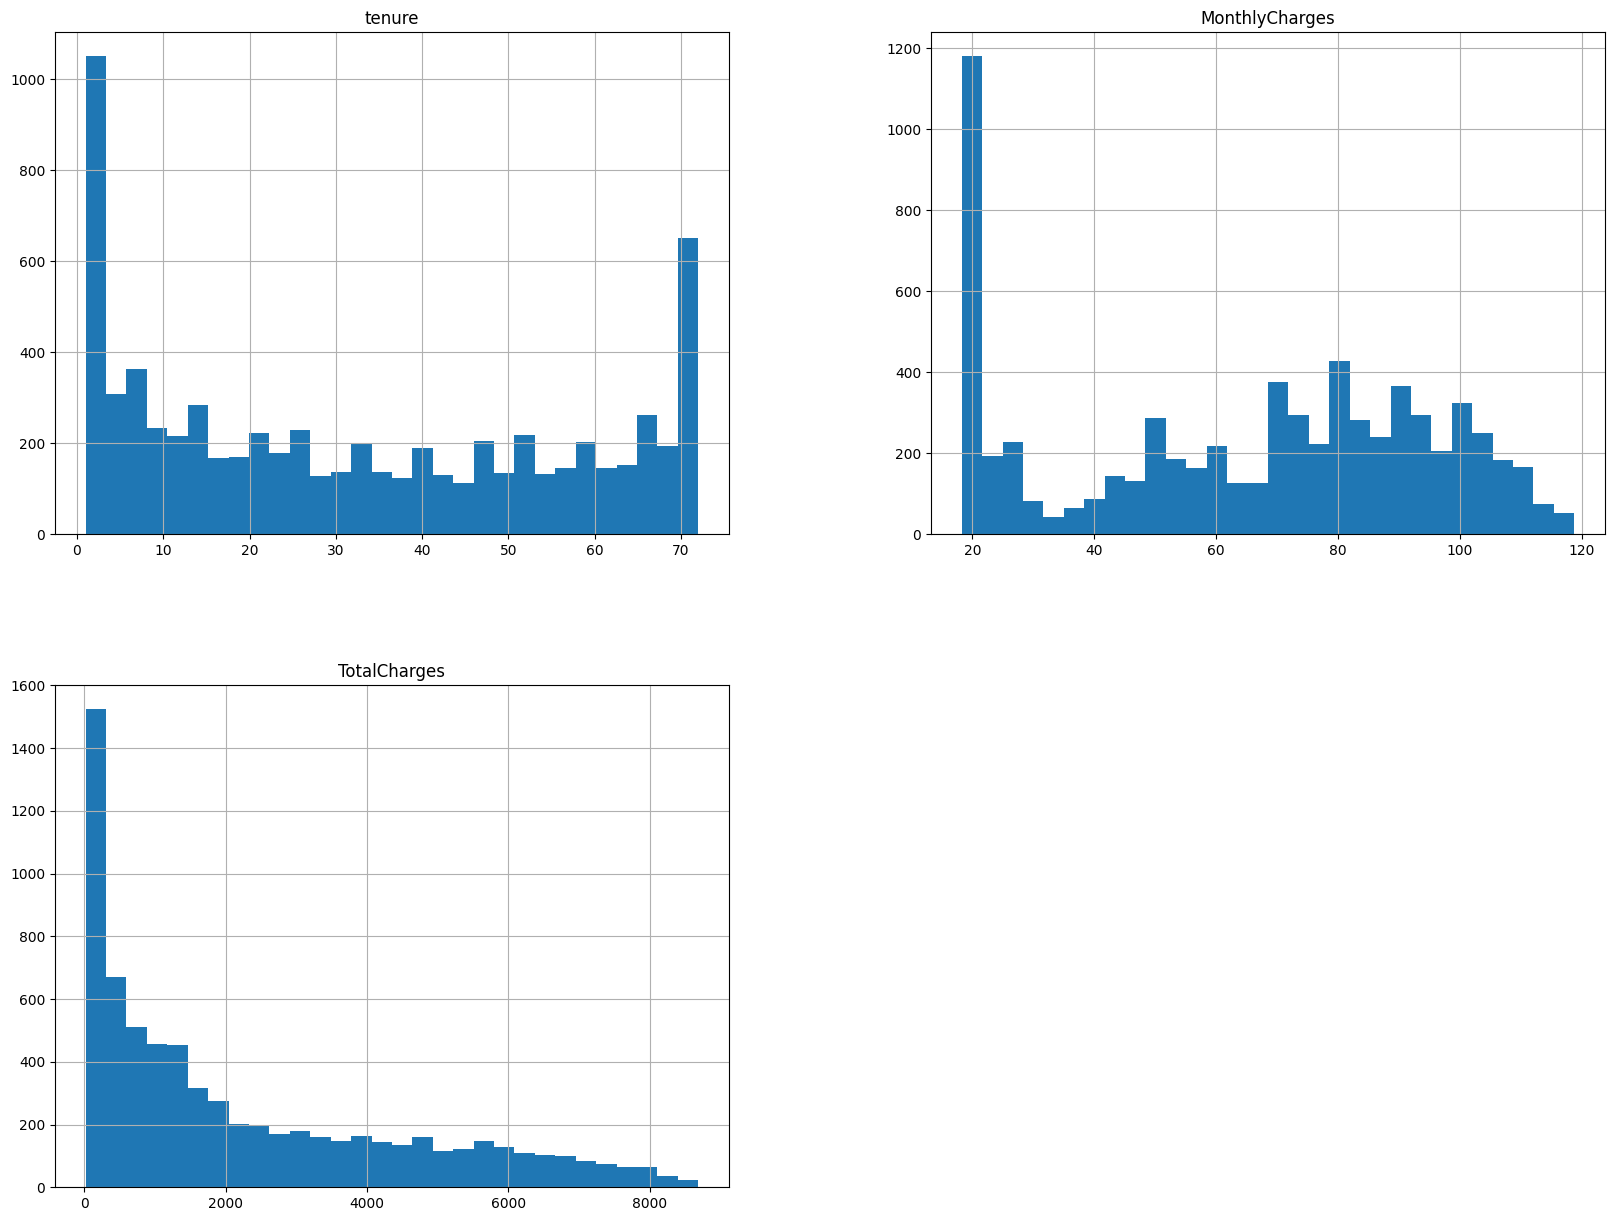

In [9]:
# Visualize numerical features
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(20, 15))
plt.show()

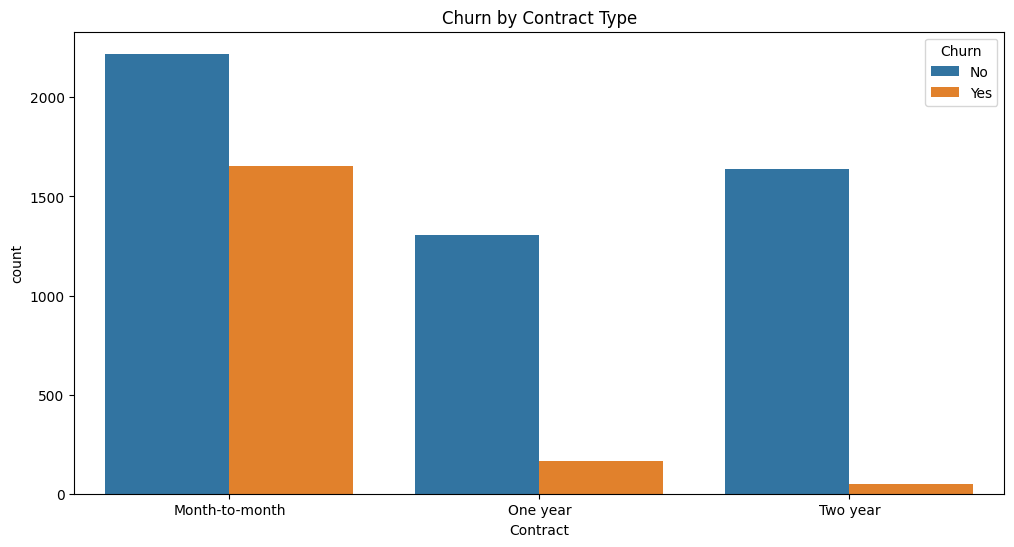

In [10]:
# Visualize churn vs categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

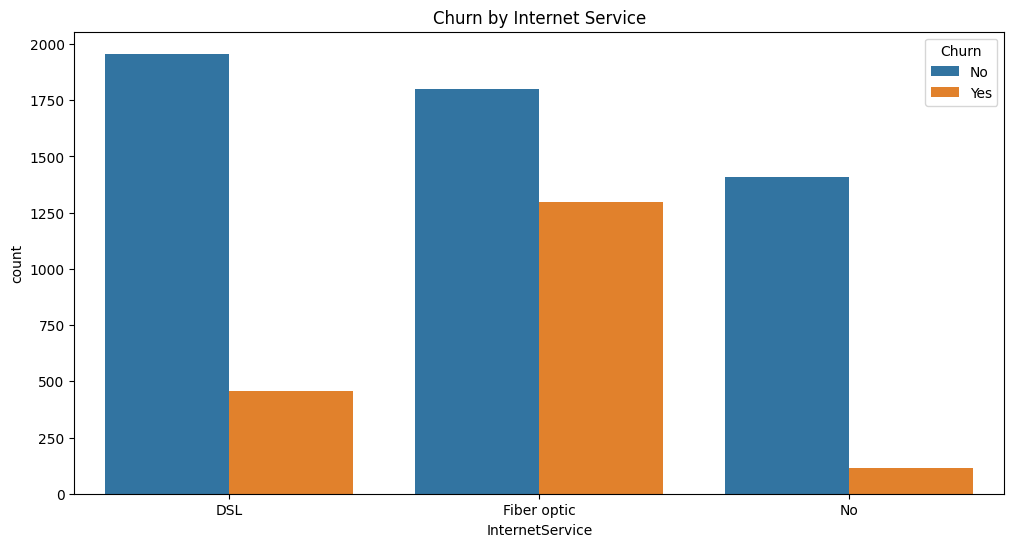

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

In [12]:
#List of columns to encode (categorical variables)
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

In [13]:
# Use LabelEncoder to transform categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [14]:
# Drop unnecessary columns
df.drop(['customerID'], axis=1, inplace=True)

In [15]:
# Separate target and features
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

In [16]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [18]:
# Fit and transform the training data, and scale the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [20]:
# Train the model
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1386  163]
 [ 288  273]]


In [23]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7862559241706161


In [24]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



In [25]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.8134533348523398


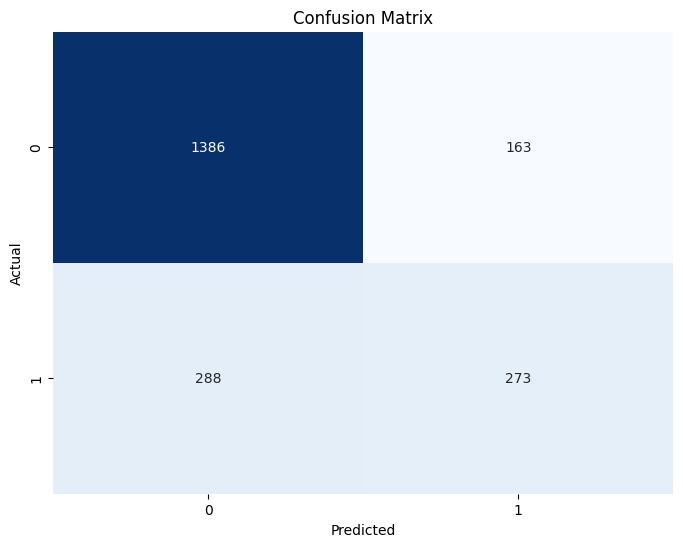

In [26]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Feature Importance (optional)
feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]
     

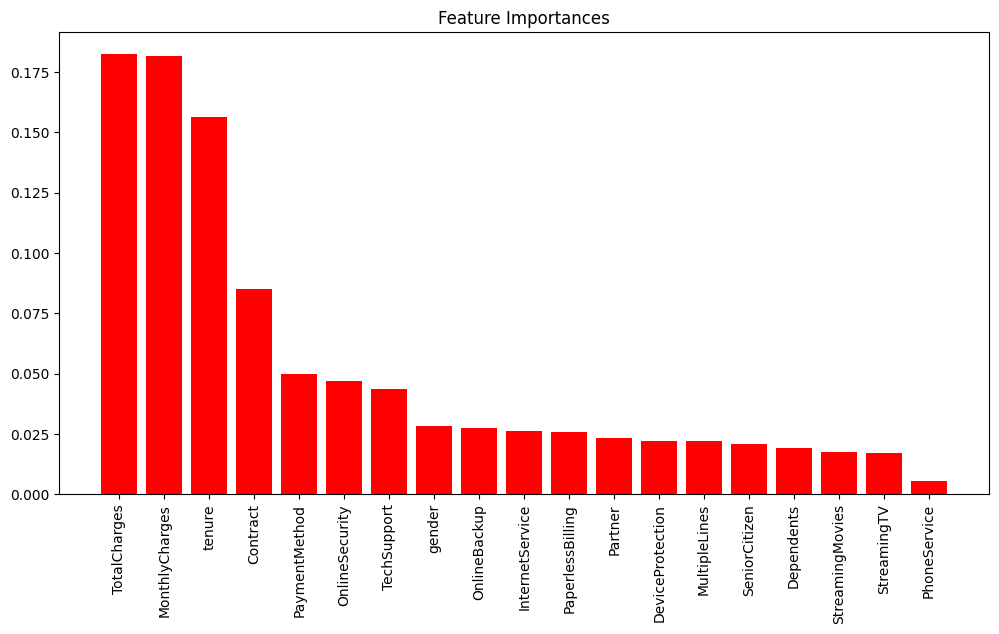

In [28]:

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()